# K-Nearest Neighbors

Loading necessary packages:

In [6]:
using LinearAlgebra, CSV, Plots
theme(:dark)

Reading house-votes84.data csv file:

In [7]:
votes = CSV.read("house-votes-84.data");

Cleaning the data:

In [8]:
m, n = length(votes[:, 1]), length(votes[1,:])
A₀ = zeros(m, n-1)

for i in 1:m
    for j in 1:n-1
        if votes[i, j+1] == "y"
            A₀[i, j] = 1

        elseif votes[i, j+1] == "n"
            A₀[i, j] = 0
        
        else
            A₀[i, j] = -1
        end 
    end
end

Re-orienting that data:

In [9]:
A₀ = A₀'

16×434 Adjoint{Float64,Array{Float64,2}}:
  0.0  -1.0   0.0   1.0  0.0   0.0   0.0  …   1.0  0.0  0.0   0.0   0.0   0.0
  1.0   1.0   1.0   1.0  1.0   1.0   1.0      0.0  0.0  0.0  -1.0   0.0   1.0
  0.0   1.0   1.0   1.0  1.0   0.0   0.0      1.0  1.0  1.0   0.0   0.0   0.0
  1.0  -1.0   0.0   0.0  0.0   1.0   1.0      0.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0  -1.0   1.0  1.0   1.0   1.0     -1.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0   1.0   1.0  1.0   1.0   1.0  …   0.0  1.0  0.0   1.0   1.0   1.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  0.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  0.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  1.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  1.0  1.0   0.0  -1.0   1.0
  0.0   1.0   1.0   1.0  0.0   0.0   0.0  …   0.0  0.0  0.0   1.0   0.0   0.0
  1.0   0.0   0.0  -1.0  0.0   0.0   0.0      1.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0   1.0   1.

Making a sample of our data to use:

In [10]:
A₀_train = copy(A₀[:, 1:330])
A₀_test = copy(A₀[:, 331:434])

16×104 Array{Float64,2}:
  1.0   1.0  0.0   0.0   0.0   0.0  1.0  …   1.0  0.0  0.0   0.0   0.0   0.0
 -1.0   0.0  0.0   1.0   0.0   0.0  0.0      0.0  0.0  0.0  -1.0   0.0   1.0
  1.0   1.0  1.0   1.0   0.0   1.0  1.0      1.0  1.0  1.0   0.0   0.0   0.0
  0.0   0.0  0.0   0.0   1.0   0.0  0.0      0.0  1.0  0.0   1.0   1.0   1.0
  0.0   0.0  0.0   0.0   1.0   0.0  0.0     -1.0  1.0  0.0   1.0   1.0   1.0
  0.0   0.0  0.0   1.0   1.0   1.0  0.0  …   0.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0  1.0   1.0   0.0   1.0  1.0      1.0  0.0  1.0   0.0  -1.0   0.0
  1.0   1.0  1.0   1.0   0.0   1.0  1.0      1.0  0.0  1.0   0.0  -1.0   0.0
  1.0   1.0  1.0  -1.0   0.0   0.0  1.0      1.0  1.0  1.0   0.0  -1.0   0.0
  0.0   0.0  0.0   0.0   1.0   0.0  0.0      1.0  1.0  1.0   0.0  -1.0   1.0
  0.0   1.0  0.0   1.0   1.0   1.0  0.0  …   0.0  0.0  0.0   1.0   0.0   0.0
  0.0   0.0  0.0   1.0   1.0   0.0  0.0      1.0  1.0  0.0   1.0   1.0   1.0
  0.0   0.0  0.0   0.0   1.0   0.0  0.0      0.0  1

Centering the sample data matrix:

In [11]:
A = copy(A₀_train)

for i = 1:size(A)[1]
    # Calculate the mean of the i-th row
    μ = sum(A[i, :]) / size(A)[2]
    
    # Subtract the mean from each entry in the i-th row
    for j = 1:size(A)[2]
        A[i, j] -= μ
    end
end



Defining the sample covariance:

In [12]:
S = A*A'/(size(A)[2] - 1)

16×16 Array{Float64,2}:
  0.28996     0.02217      0.121691    …  -0.0733352    0.0852722  0.0135028 
  0.02217     0.456194     0.0184581       0.00226582  -0.0118265  0.0118081 
  0.121691    0.0184581    0.29533        -0.140039     0.145123   0.00453164
 -0.0746891   0.0375518   -0.15601         0.158497    -0.101796   0.0304504 
 -0.0791379   0.0575297   -0.158552        0.188671    -0.114728   0.028903  
 -0.0880354   0.0518928   -0.102846    …   0.166952    -0.0858801  0.0136502 
  0.107175   -0.0379294    0.160099       -0.11202      0.129207   0.0648982 
  0.115115   -0.0372479    0.191268       -0.123846     0.136447   0.029732  
  0.0624942  -0.0376255    0.137607       -0.116883     0.109146   0.0794879 
 -0.0160357  -0.00319609   0.0137054       0.0614534    0.0235977  0.0938012 
  0.0453993   0.107516     0.0758773   …  -0.00569218   0.0849406  0.0604587 
 -0.0781339   0.0245832   -0.142636        0.16336     -0.0969329  0.0391637 
 -0.0833103   0.0780602   -0.121857     

Finding the SVD of the sample covariance:

In [13]:
U, Σ, V = svd(S)

SVD{Float64,Float64,Array{Float64,2}}([-0.182202 0.0550807 … -0.0204318 -0.00933179; 0.0690456 0.0942714 … -0.0509645 -1.36447e-5; … ; -0.235638 0.137968 … 0.00976935 0.0100573; 0.00672614 0.87211 … 0.0287467 -0.0187489], [1.86205, 0.839601, 0.544907, 0.385855, 0.298963, 0.261781, 0.235417, 0.215323, 0.193482, 0.146466, 0.144916, 0.139062, 0.12254, 0.0987566, 0.0844218, 0.0512855], [-0.182202 0.0690456 … -0.235638 0.00672614; 0.0550807 0.0942714 … 0.137968 0.87211; … ; -0.0204318 -0.0509645 … 0.00976935 0.0287467; -0.00933179 -1.36447e-5 … 0.0100573 -0.0187489])

Visualizing the data:

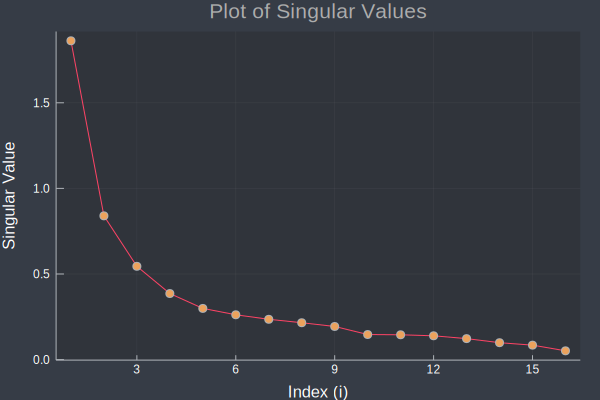

In [14]:
plot(Σ, legend = false)
scatter!(Σ, xaxis = "Index (i)", yaxis = "Singular Value", title = "Plot of Singular Values")

Visualizing PCA:

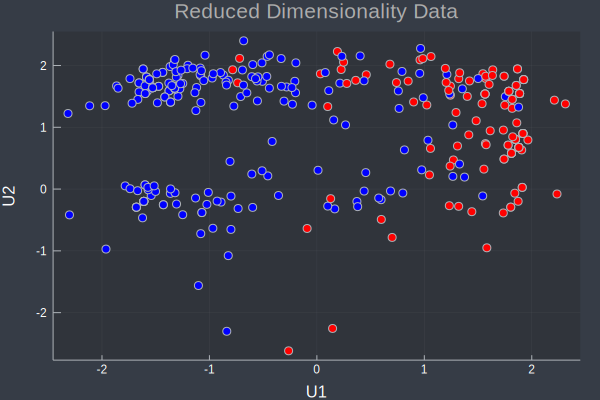

In [15]:
U_reduced = U[:, 1:2]
scatter(legend = false,
        title = "Reduced Dimensionality Data",
        xaxis = "U1",
        yaxis = "U2")

for i = 1:size(A₀_train)[2]
    p = U_reduced'*A₀_train[:, i]
    party = votes[i, 1] == "democrat" ? "blue" : "red"
    scatter!([(p[1], p[2])], color = party)
end

scatter!()



Implementing the K-nearest neighbors algorithm and make a prediction on an out of sample data instance:

Setting up the data for the function:;

In [16]:
training_data = U_reduced'*A₀_train
training_data = [(training_data[1, i], training_data[2,i]) for i = 1:330];

Setting up the functions for K-nearest:

In [17]:
function distance(p1, p2)
    return sqrt((p1[1] - p2[1])^2 + (p1[2] - p2[2])^2)
end

function k_nearest_neighbor(k, training_data, data_instance, party)
    point = U_reduced' * data_instance
    point = (point[1], point[2])
    neighbors = []
    for i = 1:length(training_data)
        p = training_data[i]
        dist = distance(point, p)
        push!(neighbors, (votes[i, 1], p, dist))
    end
    sort!(neighbors, by = x -> x[3])
    return neighbors[1:k]
end



k_nearest_neighbor (generic function with 1 method)

Implementing the function:

In [49]:
# Using the value of 10 will return the 10 closest neighbors to our point
test = k_nearest_neighbor(10, training_data, A₀[:,420], votes[420,1])

10-element Array{Any,1}:
 ("republican", (0.6800150115612097, 2.021913544348335), 0.14322461226306174) 
 ("democrat", (0.40276649821171345, 2.155114553316043), 0.17342661017242963)  
 ("republican", (0.4598853366891222, 1.8512212647197708), 0.21219964108598113)
 ("republican", (0.24858324623291178, 2.0542039676956882), 0.2906761177558987)
 ("democrat", (0.7922334976960762, 1.9035466362871791), 0.29139005849252464)  
 ("democrat", (0.43946988342266263, 1.7523645774230963), 0.3120427353667185)  
 ("democrat", (0.23281525345753806, 2.148617239505832), 0.3224641767470536)   
 ("republican", (0.22609792568288006, 1.9352697026558427), 0.3327867480785868)
 ("republican", (0.36176490324269633, 1.7598741882001376), 0.3384115803514974)
 ("republican", (0.7407445721957112, 1.7240786091709701), 0.3815436570644599) 

Plotting these neighbors:

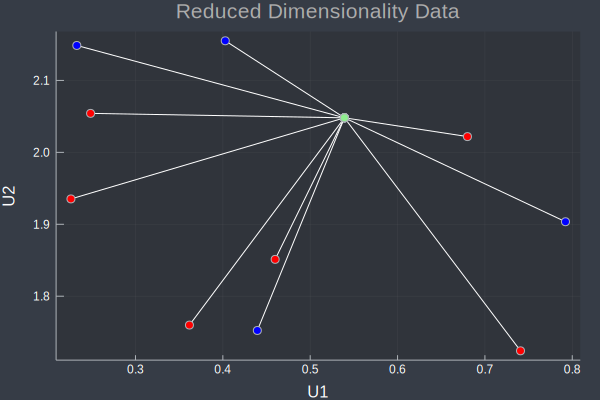

In [19]:
scatter(legend = false,
        title = "Reduced Dimensionality Data",
        xaxis = "U1",
        yaxis = "U2")
test_point = U_reduced' * A₀[:, 420]
test_point = (test_point[1], test_point[2])

for i = 1:10
    plot!([test_point, test[i][2]], color = "white")
end

for i = 1:10
    scatter!([test_point, test[i][2]], color = test[i][1] == "democrat" ? "blue" : "red")
end

scatter!([test_point], color = "light green")



In [20]:
party = []

for i = 1:size(A₀_test)[2]
    push!(party, votes[i, 1] == "democrat" ? :blue : :red)
end

This function will produce a scatter plot of our closest neighbor:

In [50]:
function nearest_prediction(k, i)
    
    scatter(title = "Reduced Dimensionality Data",
            legend = false,
            xaxis = "First Principal Component: u1",
            yaxis = "Second Principal Conponent: u2")
    
    point = U_reduced'*A₀[:, i]
    point = (point[1], point[2])
    training_data = U_reduced'*A₀_train
    training_data = [(training_data[1, j], training_data[2,j]) for j = 1:size(training_data)[2]]
    neighbors = []
    
    for j = 1:length(training_data)
        p = training_data[j]
        dist = distance(point, p)
        push!(neighbors, (votes[j, 1], p, dist))
    end
    
    sort!(neighbors, by = x -> x[3])
    neighbors = neighbors[1:k]
    
    

    for i = 1:k
        plot!([point, neighbors[i][2]], color = "yellow")
        D = 0
        R = 0
        
        if neighbors == "Democrat"
            D += 1    
        else 
            R +=1
        end
    
        party = R < D ? "Democrat" : "Republican" 
    end
        

    scatter!([point], label = party, color = "white")
    scatter!([(neighbors[1][2])], color = party)

end




nearest_prediction (generic function with 1 method)

Implementing the function:

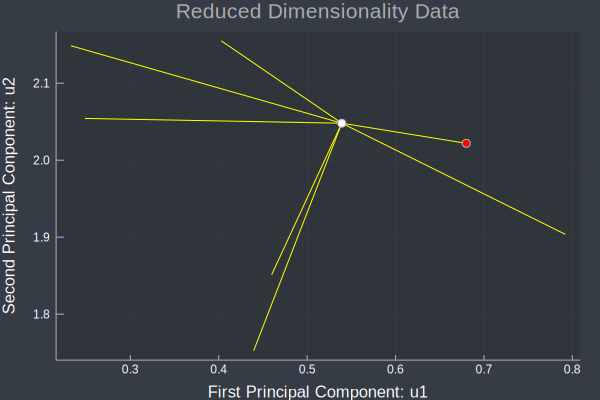

In [51]:
nearest_prediction(7, 420)

Our point is most likely:

In [48]:
neighbors[1][1]

"republican"